In [115]:
from pandas import read_csv,to_datetime,DataFrame
from matplotlib import pyplot as plt
import numpy as np
from time import ctime
from math import log


In [116]:
type(to_datetime(15))

pandas._libs.tslibs.timestamps.Timestamp

# READ DATA

In [117]:
df = read_csv("./data\GLMRUSD_1.csv")
df.columns = ['time','open','high','low','close','volume','trades']
df.head()

,time,open,high,low,close,volume,trades
0,1641929700,19.000,19.000,19.000,19.000,1.460000,1
1,1641929760,13.000,15.219,13.000,15.219,79.200000,5
2,1641929820,14.418,15.000,14.418,15.000,66.550667,3
3,1641929880,15.000,15.000,14.101,15.000,205.554667,16
4,1641929940,14.500,14.500,11.000,11.000,358.641550,7


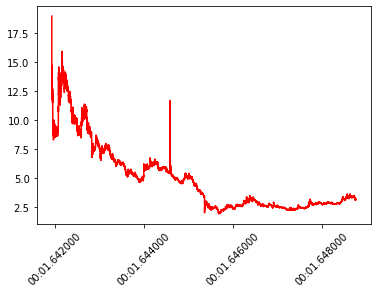

In [118]:
times = [to_datetime(i) for i in df['time']] #(df['time']-df['time'].min())/(df['time'].max() - df['time'].min())

plt.plot(times,df['open'],c='r')
plt.xticks(rotation = 45)

# plt.plot(times,df['high'],c = 'b')

# plt.plot(times,df['low'], c = 'g')

# plt.plot(times,df['close'],c='y')
plt.show()

3.942129538376631e-05
7.884259076753262e-05
0.00011826388615129894
0.00015768518153506524
0.00019710647691883155
0.00023652777230259787
0.00027594906768636416
0.0003153703630701305
0.0003547916584538968
0.0003942129538376631
0.0004336342492214294
0.00047305554460519574
0.0005124768399889621
0.0005518981353727283
0.0005913194307564947
0.000630740726140261
0.0006701620215240273
0.0007095833169077936
0.0007490046122915598
0.0007884259076753262
0.0008278472030590925
0.0008672684984428589
0.0009066897938266251
0.0009461110892103915
0.0009855323845941579
0.0010249536799779241
0.0010643749753616904
0.0011037962707454566
0.001143217566129223
0.0011826388615129894
0.0012220601568967556
0.001261481452280522
0.0013009027476642882
0.0013403240430480546
0.001379745338431821
0.0014191666338155872
0.0014585879291993534
0.0014980092245831197
0.0015374305199668862
0.0015768518153506524
0.0016162731107344187
0.001655694406118185
0.0016951157015019514
0.0017345369968857177
0.001773958292269484
0.00181337

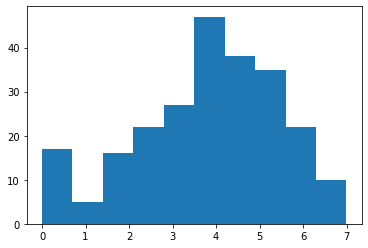

In [114]:
Starting = True
EPSUP = 1.05 # up by X percent 
EPSLOW = 1 # down by X percent
results = []
whole= len(df['time'])
c = 1
for row in df.iterrows():
    print(c/whole)
    c+=1
    if Starting:
        origin_price = row[1]['open']
        origin_time = row[1]['time']
        Starting = False
    current_price = row[1]['open']
    current_time = row[1]['time']
    p = current_price/origin_price
    
    # print(ctime(current_time),p)
    if p > EPSUP: # gone up by X 
        results.append((ctime(current_time),log((current_time-origin_time)/60),p)) #minutes, percent
        origin_price = current_price
        origin_time = current_time
    elif p < EPSLOW: # went down by X
        Starting = True
        
# plt.scatter([i[1] for i in results],[i[2] for i in results],c='r')
# #plt.scatter([i[1] for i in results],[i[2] for i in results],c='g')
b = list(set([i[1] for i in results]))
print(b)
b.sort()
plt.hist([i[1] for i in results],range=(min(b),max(b)))
plt.show()
# plt.show()
# print(len(results))
# print(results)
        # elif p < EPSLOW:
        #     pass
        # else:
        #     pass
        

In [97]:
from math import e
s = 0
c = 0
month = 'Mar'
for r in results:
    if "2022" in r[0] and month in r[0]:
        # print(r)
        s += r[1]
        c+=1
print(min([e**(r[1])/60 for r in results if "2022" in r[0] and month in r[0]]))
print(max([e**(r[1])/60 for r in results if "2022" in r[0] and month in r[0]]))
print(e**(s/c)/60,s,c)


17.516666666666666
240.18333333333325
69.11269784944945 49.98049821958745 6


# Analyze rises time and size 

In [137]:
Starting = True
EPSUP = 1 # up by X percent 
EPSLOW = 0.9 # down by X percent
results = []
whole= len(df['time'])
c = 1
for row in df.iterrows():
    print(c/whole)
    c+=1
    if Starting:
        origin_price = row[1]['open']
        origin_time = row[1]['time']
        last = 1
        Starting = False
    current_price = row[1]['open']
    current_time = row[1]['time']
    p = current_price/origin_price
    # print(ctime(current_time),p)
    if p < last: # gone up by X 
        if p>=1 and current_time != origin_time:
            results.append((ctime(current_time),log((current_time-origin_time)/60),p)) #minutes, percent
        # origin_price = current_price
        # origin_time = current_time
        Starting = True
    else: # p < EPSLOW: # went down by X
        last = p
        

3.942129538376631e-05
7.884259076753262e-05
0.00011826388615129894
0.00015768518153506524
0.00019710647691883155
0.00023652777230259787
0.00027594906768636416
0.0003153703630701305
0.0003547916584538968
0.0003942129538376631
0.0004336342492214294
0.00047305554460519574
0.0005124768399889621
0.0005518981353727283
0.0005913194307564947
0.000630740726140261
0.0006701620215240273
0.0007095833169077936
0.0007490046122915598
0.0007884259076753262
0.0008278472030590925
0.0008672684984428589
0.0009066897938266251
0.0009461110892103915
0.0009855323845941579
0.0010249536799779241
0.0010643749753616904
0.0011037962707454566
0.001143217566129223
0.0011826388615129894
0.0012220601568967556
0.001261481452280522
0.0013009027476642882
0.0013403240430480546
0.001379745338431821
0.0014191666338155872
0.0014585879291993534
0.0014980092245831197
0.0015374305199668862
0.0015768518153506524
0.0016162731107344187
0.001655694406118185
0.0016951157015019514
0.0017345369968857177
0.001773958292269484
0.00181337

In [138]:
from math import e
s = 0
c = 0
for r in results:
    if "2022" in r[0] and "Mar" in r[0]  :
        print(r)
        s += r[1]
        c+=1
print(e**(s/c)/60,s,c)
b = list(set([((i[2])%1) *10000 for i in results]))
b.sort()
plt.hist([((i[2] )%1) *10000 for i in results],range=(min(b),max(b)),density=False)
plt.show()


ZeroDivisionError: division by zero

         time    open    high     low   close      volume  trades
0  1641929700  19.000  19.000  19.000  19.000    1.460000       1
1  1641929760  13.000  15.219  13.000  15.219   79.200000       5
2  1641929820  14.418  15.000  14.418  15.000   66.550667       3
3  1641929880  15.000  15.000  14.101  15.000  205.554667      16
4  1641929940  14.500  14.500  11.000  11.000  358.641550       7


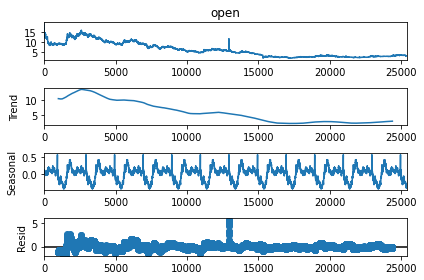

In [149]:
print(df.head())
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['open'],period = 2000)
results.plot()

In [157]:
l = len(df)
train = list(df['open'].iloc[:int(l*0.8)])
train = [[i] for i in train]
times = df['time'].iloc[:int(l*0.8)]
test = df['open'].iloc[int(l*0.8):]
test = [[i] for i in test]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, times, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
